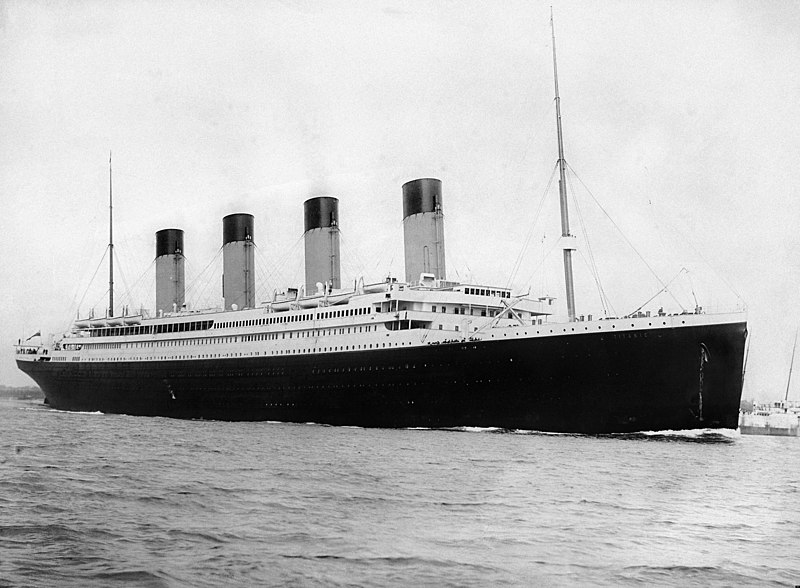

In [1]:
import IPython.display as display
from PIL import Image
display.display(Image.open('C:\\Users\\ncali\\OneDrive\\Documentos\\GEIA\\Análise Titanic\\RMS_Titanic_3.jpg'))
#biblioteca IPython.display para exibir uma imagem em um notebook Jupyter e a biblioteca Pillow para abrir a imagem.

In [2]:
!pip install missingno
from IPython.display import display

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
import pandas as pd

dados = pd.read_csv(r"C:\Users\ncali\OneDrive\Documentos\GEIA\Análise Titanic\train.csv", encoding = 'utf8', sep = ',', na_values = 'na')
display(dados)

dados.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**TÉCNICA 1: HEATMAP DO PACOTE SEABORN**

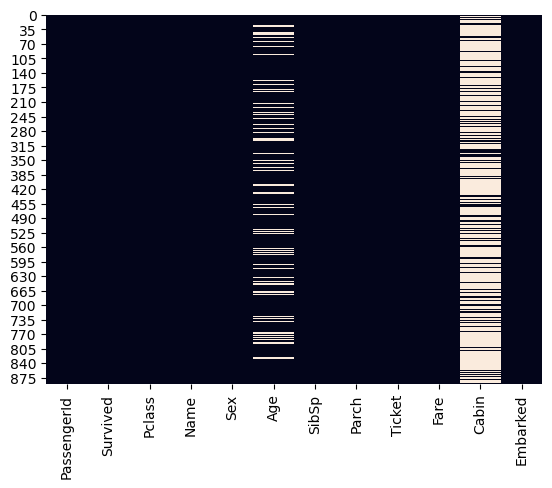

In [4]:
sns.heatmap(dados.isnull(), cbar = False);

**Visualizando o gráfico feito com o heatmap do Seaborn, podemos perceber que:**

. O atributo Age (Idade)  apresenta valores faltantes distribuídos por todo o conjunto de dados;
. O atributo Cabin (Cabine) apresenta valores faltantes de forma bem densa em todo o conjunto de dadaos;



In [5]:
dados[dados["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**TÉCNICA 2: MODULO MISSINGNO, NOS OFERECE UMA ANÁLISE MAIS ROBUSTA**

**A segunda técnica é utilizando o módulo missingno, para isso temos que digitar o seguinte código:**

<AxesSubplot:>

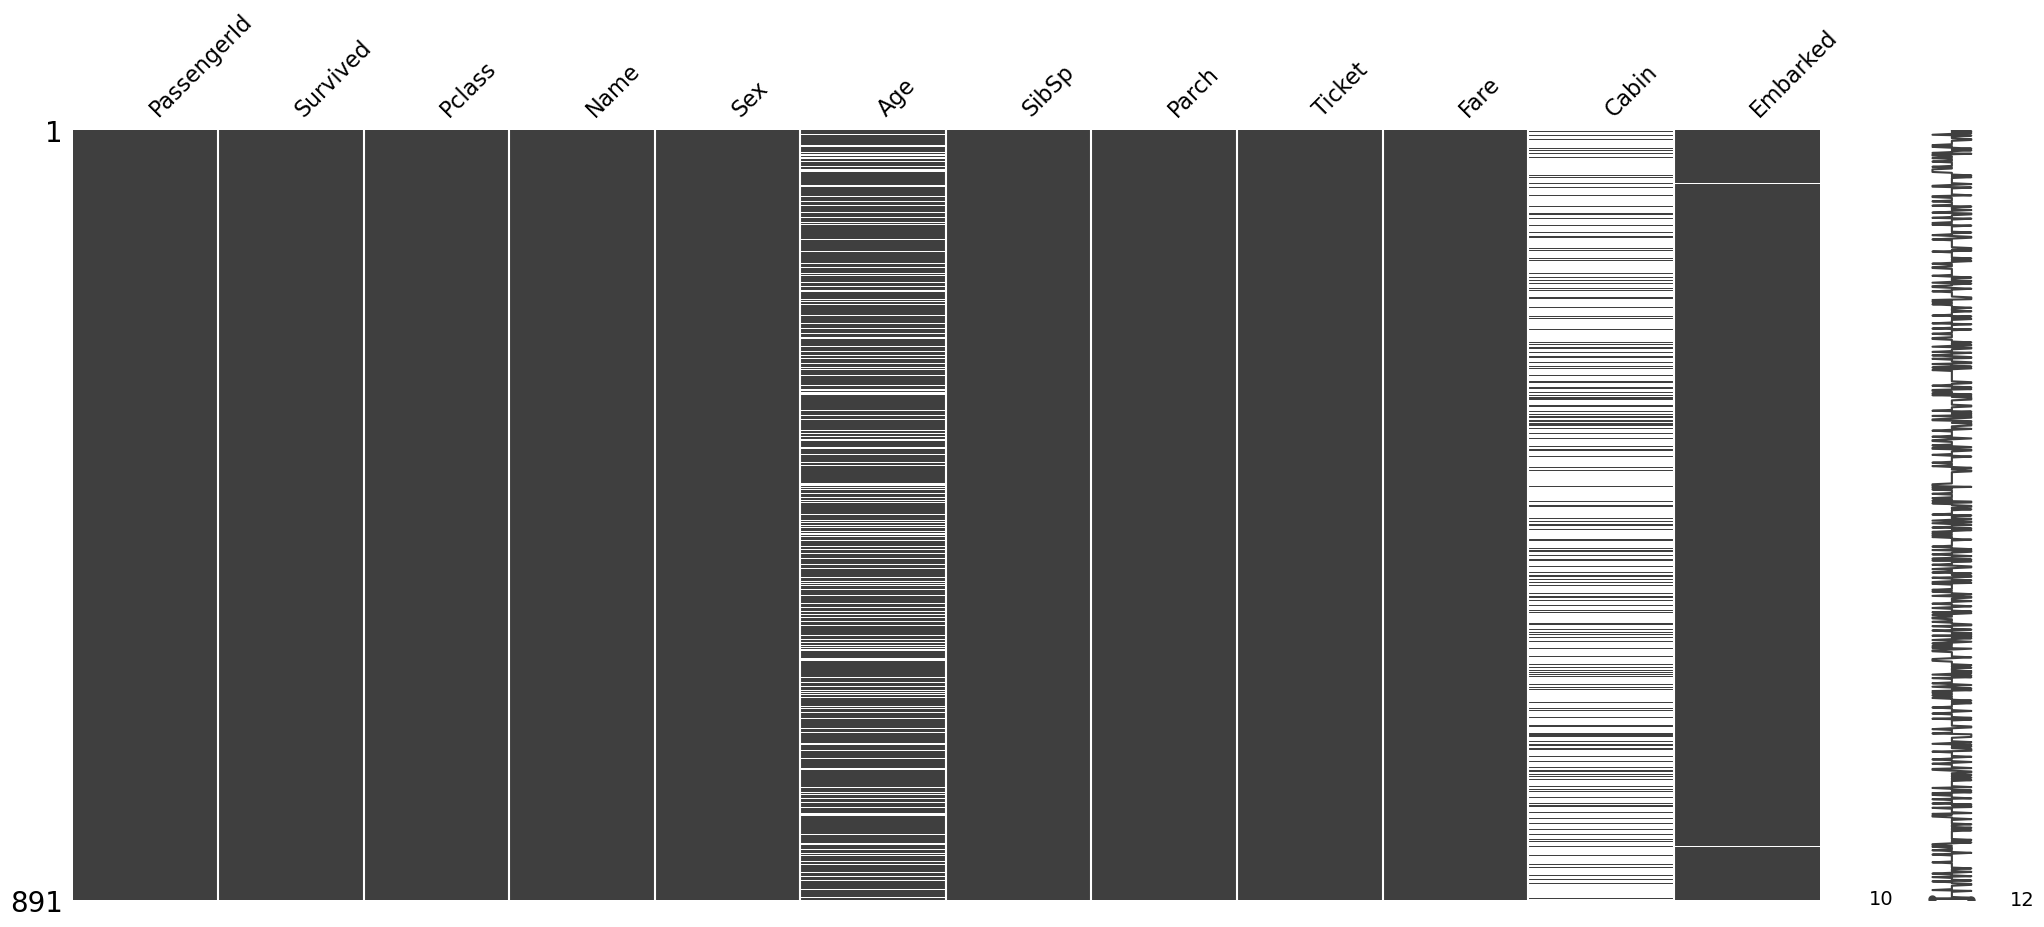

In [6]:
import missingno as msno 
msno.matrix(dados)

Visualizando o gráfico feito com o módulo missingno, podemos fazer as mesmas inferências feitas utilizando o heatmap do Seaborn.



**Além disso, com esse módulo podemos fazer um gráfico de barras, que representa de forma mais simples a nulidade dos atributos (colunas), apenas com o código:**

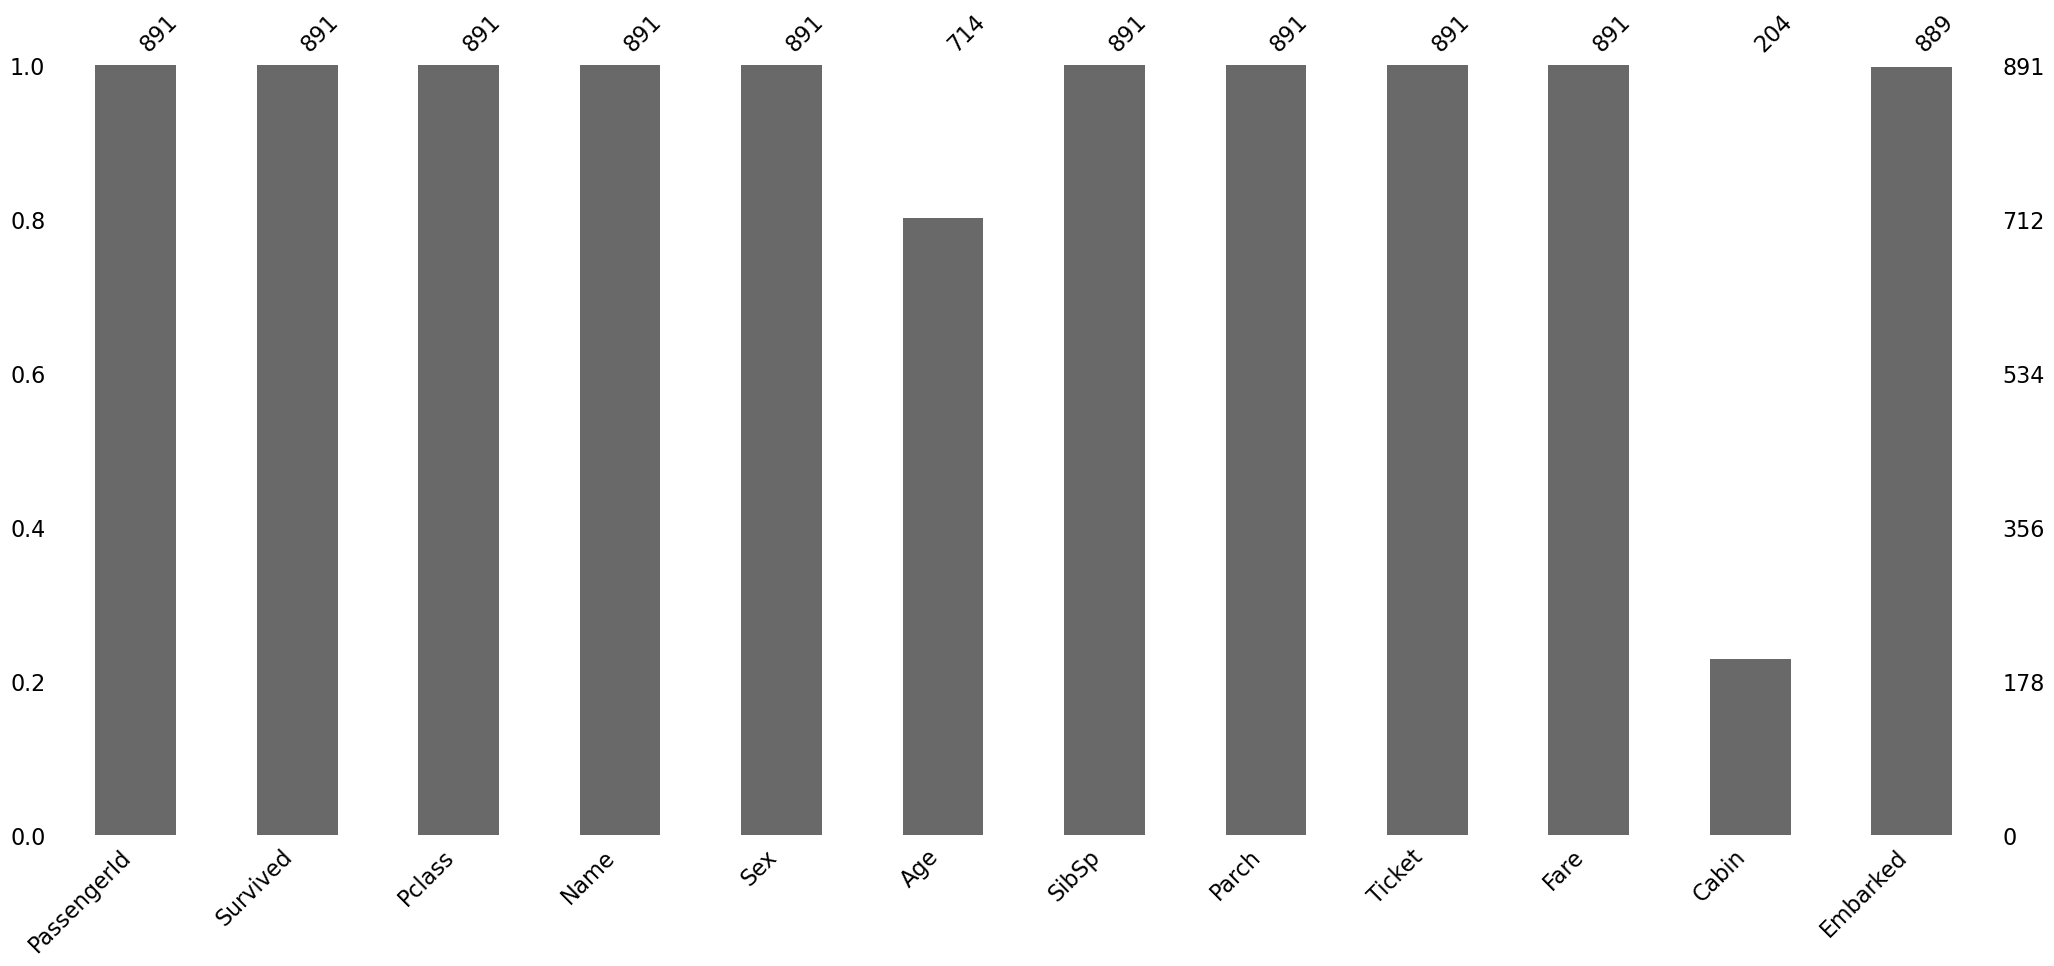

In [7]:
msno.bar(dados);

**Ainda, conseguimos verificar se há correlação entre os valores faltantes, através do seguinte código:**

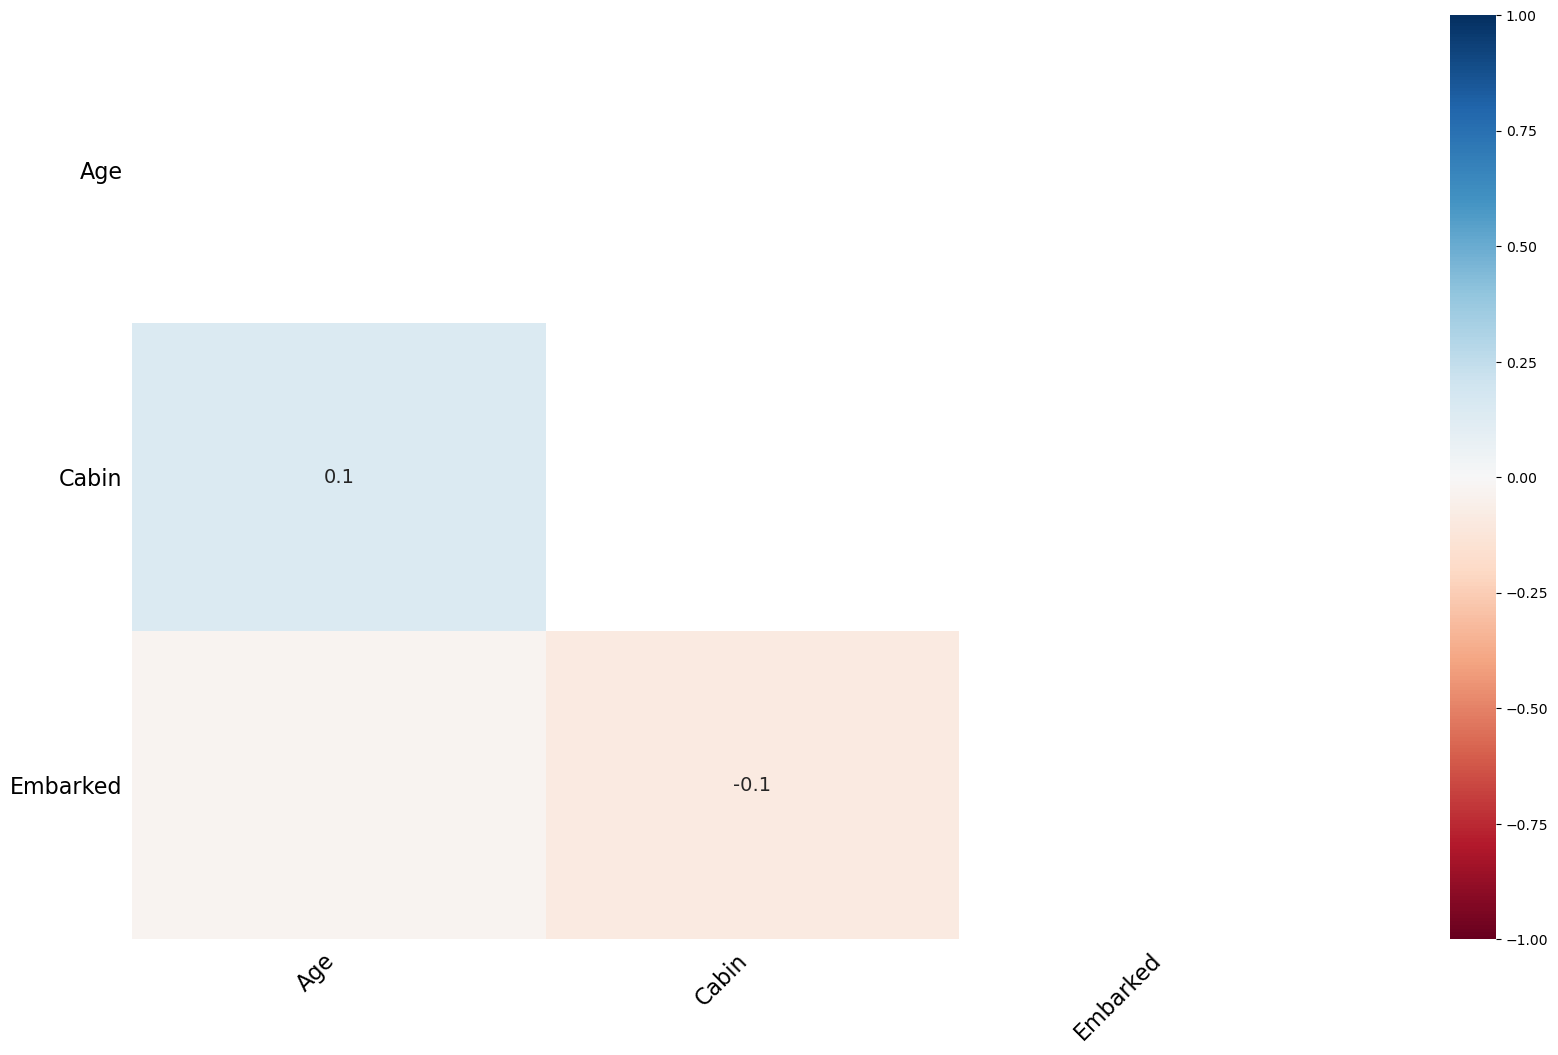

In [8]:
msno.heatmap(dados);

**Vamos retirar as colunas 'Name' e 'Ticket', já que não irão nos ajudar em nossa análise.**

In [9]:
dados.drop('Name', axis=1, inplace=True)
dados.drop('Ticket', axis=1, inplace=True)
display(dados)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [10]:
#dados['Embarked'].unique()
#dados['Embarked'] = dados['Embarked'].map({'C': '1', 'Q': '2', 'S': '3'})
#dados['Sex'] = dados['Sex'].map({'male': '1', 'female': '2'})
#display(dados)




In [11]:
#import pandas as pd

In [12]:
#dados["Cabin"].unique()
#dados["Cabin_num"] = pd.factorize(dados["Cabin"])[0]
#dados["Cabin_num"] = dados["Cabin_num"].replace(-1, np.NaN)
#dados['Sex'] = pd.to_numeric(dados['Sex'], errors = 'coerce')
#display(dados.head(20))


        
    
    
    

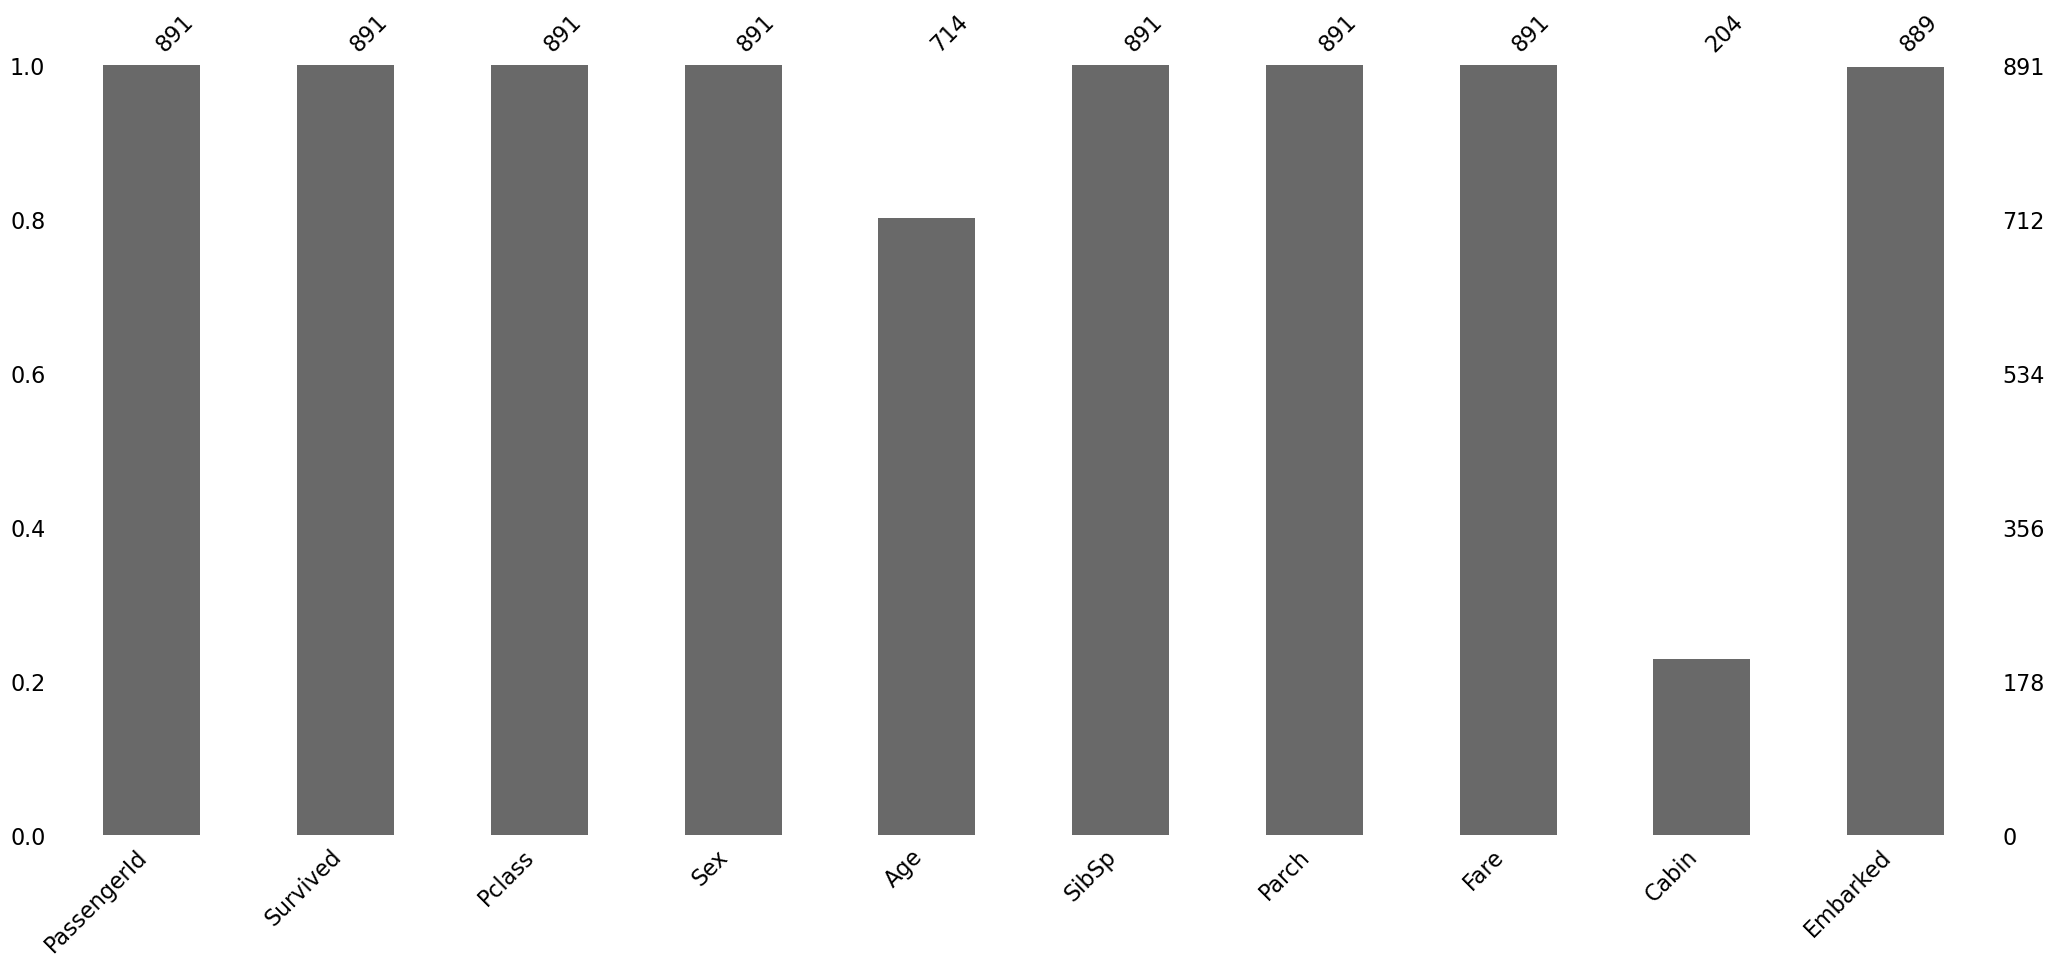

In [13]:
msno.bar(dados);

In [96]:
metadata = pd.DataFrame(dados.dtypes, columns = ["tipo"])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(dados.groupby([var]). size())
metadata
    

,tipo,n_categorias
PassengerId,int64,889
Survived,int64,2
Pclass,int64,3
Sex,object,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,247
Embarked,object,3


In [14]:
#Observamos que a nova coluna Cabin_num contém agora a mesma quantidade de valores "NaN", e constitui-se agora de uma coluna numérica, com valores numéricos atribuídos a cada categoria existente na coluna Cabin.

In [15]:
#dados.drop('Cabin', axis=1, inplace=True)
#dados['Embarked'] = pd.to_numeric(dados['Embarked'], errors = 'coerce')
#display(dados)
#dados.info()

In [16]:
#Hipótese nula: Os dados ausentes são MCAR.
#Hipótese Alternativa: Os dados ausentes não são MCAR.
#Para rejeitar a hipótese nula, valor p tem de ser menor que 0,05, logo, não rejeitamos a hipótese nula e aceitamos que os 
    #dados são MCAR.

#from scipy.stats import chi2

#def little_mcar_test(dados, alpha = 0.05):
#calcular a proporção de valores faltantes em cada variável
    #p_m = dados.isnull().mean()
#calcular a proporção de casos completos em cada variável.
    #p_c = dados.dropna().shape[0] / dados.shape[0]
#calcular a matriz de correlação para todos os pares de variáveis que tem casos completos
   # R_c = dados.dropna().corr()
#calcular a matriz de correlação para todos os pares de variáveis usando todas as observações
    #R_all = dados.corr()
#calcular a diferença entre as duas matrizes de correlação
    #R_diff = R_all - R_c
#calcular a variancia da matriz R_diff
    #V_Rdiff = np.var(R_diff, ddof=1)
#Calcule o valor esperado de V_Rdiff sob a hipótese nula de que os dados ausentes são MCAR
    #E_Rdiff = (1 - p_c) / (1 - p_m).sum()
#calcular o teste estatístico
    #T = np.trace(R_diff) / np.sqrt(V_Rdiff * E_Rdiff)
#calcular os graus de liberdade
    #df = dados.shape[1] * (dados.shape[1] - 1) / 2
#calcular o valor p usando a distribuição qui quadrada com os graus de liberdade df e o teste estatístico T
    #p_value = 1 - chi2.cdf(T ** 2, df)
    #print(f"O valor p é {p_value}.")
#criar a matriz de valores faltantes que representam o padrão de faltantes no dataset
    #missingness_matrix = dados.isnull().astype(int)
#retorna a matriz de faltantes e o valor p
    #return(missingness_matrix, p_value)

    
#little_mcar_test(dados)

In [17]:
dados_nulo = dados.isnull()
print(f'A porcentagem de dados faltantes no Dataframe dados é \n {(round(dados_nulo.mean() * 100, 2))}:')
#print(round(dados_nulo.mean() * 100, 2),'%')

A porcentagem de dados faltantes no Dataframe dados é 
 PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64:


In [18]:
def stats_dados_faltantes(dados: pd.DataFrame) -> None: #A primeira linha define uma função chamada stats_dados_faltantes que recebe um argumento chamado dados, que deve ser um DataFrame do pandas, e não retorna nada (None).

  stats_dados_faltantes = [] #A segunda linha cria uma lista vazia chamada stats_dados_faltantes para armazenar os dicionários com as estatísticas de cada coluna.
  for col in dados.columns: #A terceira linha inicia um loop for que percorre cada coluna do DataFrame dados usando o atributo columns, que retorna uma lista com os nomes das colunas.
    if dados[col].isna().any(): #A quarta linha usa uma condição if para verificar se há valores nulos na coluna atual usando o método isna(), que retorna uma série booleana com True para os valores nulos e False para os não nulos.
      qtd = dados[dados[col].isna()].shape[0] #A quinta linha calcula a quantidade de valores nulos na coluna atual usando o método shape, que retorna uma tupla com as dimensões do DataFrame ou da série. Neste caso, usamos o índice 0 para pegar o número de linhas. Para filtrar apenas os valores nulos, usamos a notação de colchetes com a série booleana retornada pelo método isna().
      total = dados.shape[0] #A sexta linha calcula o total de linhas do DataFrame dados usando o método shape novamente, mas sem nenhum filtro.
      dict_dados_faltantes = {col: {'Quantidade': qtd, "Porcentagem": round(100 * qtd/total, 2)}} #A sétima linha cria um dicionário com o nome da coluna atual como chave e outro dicionário como valor. Este dicionário interno tem duas chaves: ‘Quantidade’ e ‘Porcentagem’, que armazenam os valores calculados nas linhas anteriores. A porcentagem é arredondada para duas casas decimais usando a função round().
      stats_dados_faltantes.append(dict_dados_faltantes) #A oitava linha adiciona o dicionário criado na linha anterior à lista stats_dados_faltantes usando o método append().

  for stat in stats_dados_faltantes: #A décima linha inicia outro loop for que percorre cada elemento da lista stats_dados_faltantes, que são dicionários com as estatísticas de cada coluna.
    print(stat) #A décima primeira linha imprime cada dicionário na tela usando a função print().

In [19]:
stats_dados_faltantes(dados=dados)

{'Age': {'Quantidade': 177, 'Porcentagem': 19.87}}
{'Cabin': {'Quantidade': 687, 'Porcentagem': 77.1}}
{'Embarked': {'Quantidade': 2, 'Porcentagem': 0.22}}


**A princípio vamos deletar a coluna 'Cabin' em nossa análise. E vamos preencher as linhas nulas da coluna 'Age' com a média das idades.**

In [20]:
dados.drop('Cabin', axis = 1, inplace = True)
display(dados)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [21]:
media_age = dados['Age'].mean().round(0) 
print(media_age)



30.0


In [22]:
dados['Age'] = dados['Age'].fillna(media_age)
display(dados.head(20))



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,30.0,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [23]:
#media_age_ = dados['Age'].mean().round(2) Conferindo, a média continua sendo a mesma.
#print(media_age_)

**Temos duas linhas nulas na coluna 'Embarked'. Vamos apagar estas 2 linhas, pois não irão atrapalhar em nossa análise devido ao número total de linhas ser bem maior.**

In [24]:
dados = dados.dropna()
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB
None


In [25]:
display(dados)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,30.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


**Relação sobreviventes vs não sobreviventes. Entendimento dos dados - Univariada**

Survived
0    549
1    340
Name: count, dtype: int64

 Taxa de Sobrevivência:
0.38245219347581555


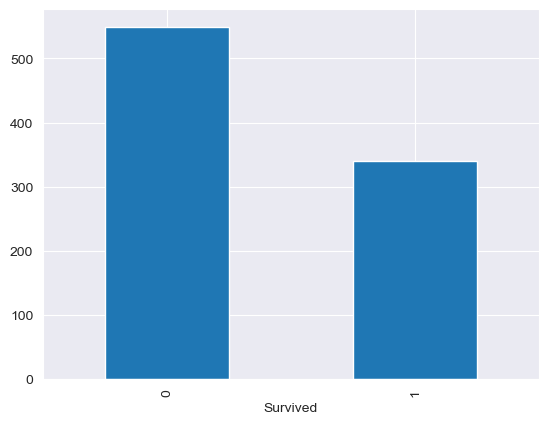

In [80]:
grafico_barras = dados['Survived'].value_counts().plot.bar()

print(dados['Survived'].value_counts())

print('\n Taxa de Sobrevivência:')
print(dados['Survived'].mean())

**Entendimento dos dados - Bivariado**

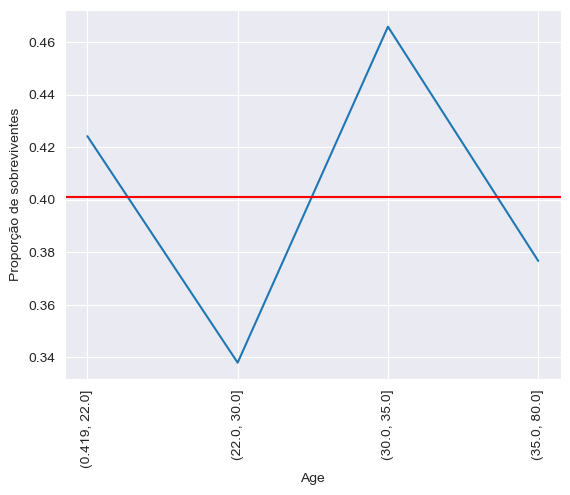

In [94]:
# Define a variável que será usada para fazer o corte em quartis
var = 'Age'
# Usa a função qcut do pandas para dividir os dados da variável em quatro grupos iguais, e retorna os limites dos intervalos
cat_srs, bins = pd.qcut(dados[var], 4, retbins = True)
# Agrupa os dados por cada grupo criado pelo qcut, e retorna um objeto do tipo groupby
g = dados.groupby(cat_srs)
# Calcula a média da variável 'Survived' para cada grupo, e retorna uma série com os valores
biv = g['Survived'].mean()
# Usa o método plot.line do pandas para criar um gráfico de linha com os valores da série biv
ax = biv.plot.line()
# Define o rótulo do eixo y como 'Proporção de sobreviventes'
ax.set_ylabel('Proporção de sobreviventes')
# Usa a função xticks do matplotlib para definir os rótulos do eixo x como os intervalos de idade de cada grupo, e rotaciona eles em 90 graus para melhorar a visualização
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)
# Traça uma linha na média do gráfico
ax.axhline(biv.mean(), color='red', linestyle= '-')

**Agora que já tratamos nossos dados,podemos seguir para a análise.**

In [27]:
#verificando o número total de passageiros

num_linhas = dados.shape[0]
print(f"O número total de passageiros a bordo eram {num_linhas}.")

#verificando a quantidade de pessoas do gênero feminino que estavam a bordo

num_mulheres = dados['Sex'].value_counts()['female']
print(f"O numero total de passsageiras MULHERES a bordo eram {num_mulheres}.")

#verificando a quantidade de pessoas do gênero masculino que estavam a bordo

num_homens = dados['Sex'].value_counts()['male']
print(f"O número total de passageiros HOMENS a bordo era {num_homens}.")

O número total de passageiros a bordo eram 889.
O numero total de passsageiras MULHERES a bordo eram 312.
O número total de passageiros HOMENS a bordo era 577.


**Exibindo dataframe apenas com as mulheres que sobreviveram.**

In [28]:
mulheres_sobreviveram = dados.loc[(dados['Sex'] == 'female') & (dados['Survived'] == 1)]
display(mulheres_sobreviveram)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...,...
874,875,1,2,female,28.0,1,0,24.0000,C
875,876,1,3,female,15.0,0,0,7.2250,C
879,880,1,1,female,56.0,0,1,83.1583,C
880,881,1,2,female,25.0,0,1,26.0000,S


**Calculando a porcentagem de mulheres que sobreviveram.**

In [29]:
mulheres_sobreviventes = (dados[(dados['Survived'] == 1) & (dados['Sex'] == 'female')].shape[0])
print(f"A quantidade de mulheres_sobreviventes foram de {mulheres_sobreviventes}.")
mulheres_a_bordo = dados['Sex'].value_counts()['female'] 
print(f"A quantidade de mulheres_a_bordo eram {mulheres_a_bordo}.")
mulheres_sobreviventes_porcentagem = (mulheres_sobreviventes / mulheres_a_bordo) * 100
print(f"A porcentagem de mulheres sobreviventes eram {mulheres_sobreviventes_porcentagem.round(0)}%.")

A quantidade de mulheres_sobreviventes foram de 231.
A quantidade de mulheres_a_bordo eram 312.
A porcentagem de mulheres sobreviventes eram 74.0%.


**Exibindo dataframe apenas com os homens que sobreviveram.**

In [30]:
homens_sobreviveram = dados.loc[(dados['Sex'] == 'male') & (dados['Survived'] == 1)]
display(homens_sobreviveram )

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
17,18,1,2,male,30.0,0,0,13.0000,S
21,22,1,2,male,34.0,0,0,13.0000,S
23,24,1,1,male,28.0,0,0,35.5000,S
36,37,1,3,male,30.0,0,0,7.2292,C
55,56,1,1,male,30.0,0,0,35.5000,S
...,...,...,...,...,...,...,...,...,...
838,839,1,3,male,32.0,0,0,56.4958,S
839,840,1,1,male,30.0,0,0,29.7000,C
857,858,1,1,male,51.0,0,0,26.5500,S
869,870,1,3,male,4.0,1,1,11.1333,S


In [31]:
homens_sobreviventes = (dados[(dados['Survived'] == 1) & (dados['Sex'] == 'male')].shape[0])
print(f"A quantidade de homens_sobreviventes foram de {homens_sobreviventes}.")
homens_a_bordo = dados['Sex'].value_counts()['male'] 
print(f"A quantidade de homens_a_bordo eram {homens_a_bordo}.")
homens_sobreviventes_porcentagem = (homens_sobreviventes / homens_a_bordo) * 100
print(f"A porcentagem de homens sobreviventes eram {homens_sobreviventes_porcentagem.round(0)}%.")

A quantidade de homens_sobreviventes foram de 109.
A quantidade de homens_a_bordo eram 577.
A porcentagem de homens sobreviventes eram 19.0%.


 **Vamos analizar as frequencias de idades mais presentes na amostra.**

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

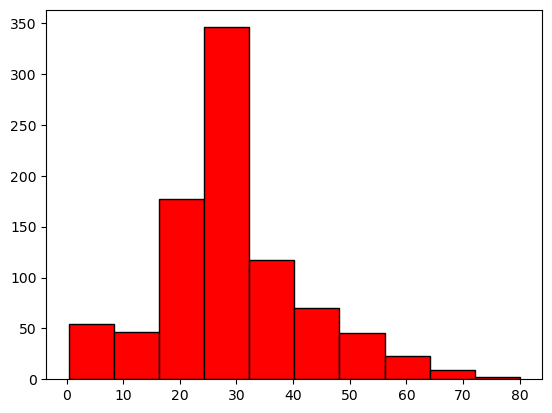

In [32]:
import matplotlib.pyplot as plt

plt.hist(dados['Age'], bins = 10, color = 'red', edgecolor = 'black')

Podemos observar que a maior parte dos passageiros estavam entre a faixa de 20 a 30 anos.

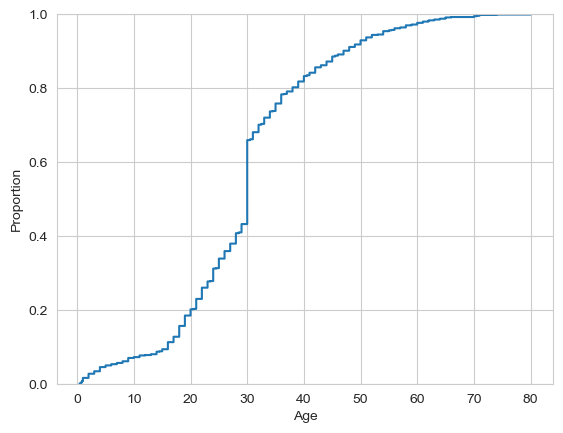

In [33]:
import seaborn as sns
sns.set_style("whitegrid")

x = dados['Age']
sns.ecdfplot(data = x)
sns.set_style('darkgrid')

Observa-se um intervalo de mais ou menos 21% (42 a 63%) dos passageiros tinham 30 anos de idade. 30 anos era a idade mais frequente entre os passageiros.


**Vamos pivotear o Dataframe e transformalo em uma tabela onde conseguimos obter melhor visualização pelo simples fato de conseguirmos indexar Survived e transformar sexo em colunas. O parâmetro aggfunc = len indica que o número de valores não nulos em cada grupo deve ser contado.**

In [34]:
titanicPivoBySex = pd.pivot_table(dados, index = ['Survived'], columns = 'Sex', aggfunc = len)
display('\Titanic Pivo table\n', titanicPivoBySex)

'\\Titanic Pivo table\n'

Age      Embarked        Fare       Parch      PassengerId       \
Sex      female male   female male female male female male      female male   
Survived                                                                      
0            81  468       81  468     81  468     81  468          81  468   
1           231  109      231  109    231  109    231  109         231  109   

         Pclass       SibSp       
Sex      female male female male  
Survived                          
0            81  468     81  468  
1           231  109    231  109

**Para chegar a uma resposta mais conclusiva sobre afirmar ou não que o sexo influenciou na questão sobrevivência, iremos realizar o teste de hipótese qui-quadrado, já que as variáveis Sex e Survived são categóricas.**

In [35]:
import scipy.stats as stats
chi2, pval, dof, expected = stats.chi2_contingency(titanicPivoBySex)
print("Chi-Squared value:", chi2)
print("pval value:", round(pval, 3))
pval = round(pval, 3)
print(pval)

Chi-Squared value: 1825.2943957432165
pval value: 0.0
0.0


Como o valor p é menor que o nível de significancia, rejeitamos a Hipótese Nula (a taxa de sobrevivência é independente do sexo do passageiro), pois com base no Teste de independência e na visualização de dados, podemos observar um efeito significativo da taxa de sexo na sobrevivência.

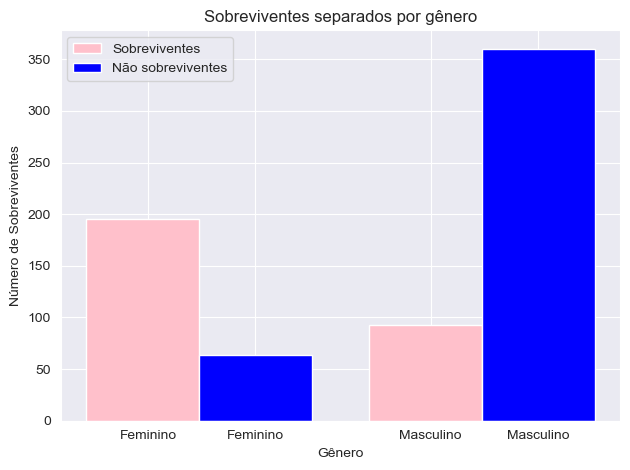

In [36]:
import matplotlib.pyplot as plt

import numpy as np

index = [0,1]
bar_width = 0.4
labels = ['Feminino', 'Feminino','Masculino', 'Masculino']
sexo_sobreviventes = {'Survived': [195, 93]}
sexo_não_sobreviventes= {'Survived': [64, 360]}
plt.bar( index, sexo_sobreviventes['Survived'], bar_width, color = ['pink', 'pink'], label = 'Sobreviventes')
plt.bar(np.array(index) + bar_width, sexo_não_sobreviventes['Survived'], bar_width, color = ['blue', 'blue'], label = 'Não sobreviventes')
plt.legend(loc = 'upper left')
plt.xlabel('Gênero')
plt.ylabel('Número de Sobreviventes')
plt.title('Sobreviventes separados por gênero')
plt.xticks([0.02, 0.4, 1.02, 1.4], labels)

plt.tight_layout()
plt.show()

**Vamos agora analizar a quantidade de sobreviventes separados por classe económica.**

In [37]:
#classe econômica 1 ou upper = Mais alta
passageiros_sobreviventes = dados.loc[(dados['Pclass'] == 1) & (dados['Survived'] == 1)]
display(passageiros_sobreviventes)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
11,12,1,1,female,58.0,0,0,26.5500,S
23,24,1,1,male,28.0,0,0,35.5000,S
31,32,1,1,female,30.0,1,0,146.5208,C
...,...,...,...,...,...,...,...,...,...
862,863,1,1,female,48.0,0,0,25.9292,S
871,872,1,1,female,47.0,1,1,52.5542,S
879,880,1,1,female,56.0,0,1,83.1583,C
887,888,1,1,female,19.0,0,0,30.0000,S


In [38]:
#classe econômica 2 ou Middle = Mediana
passageiros_sobreviventes = dados.loc[(dados['Pclass'] == 2) & (dados['Survived'] == 1)]
display(passageiros_sobreviventes)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
9,10,1,2,female,14.00,1,0,30.0708,C
15,16,1,2,female,55.00,0,0,16.0000,S
17,18,1,2,male,30.00,0,0,13.0000,S
21,22,1,2,male,34.00,0,0,13.0000,S
43,44,1,2,female,3.00,1,2,41.5792,C
...,...,...,...,...,...,...,...,...,...
831,832,1,2,male,0.83,1,1,18.7500,S
865,866,1,2,female,42.00,0,0,13.0000,S
866,867,1,2,female,27.00,1,0,13.8583,C
874,875,1,2,female,28.00,1,0,24.0000,C


In [39]:
#classe econômica 3 ou Lower = Mais baixa
passageiros_sobreviventes = dados.loc[(dados['Pclass'] == 3) & (dados['Survived'] == 1)]
display(passageiros_sobreviventes)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,1,3,female,26.0,0,0,7.9250,S
8,9,1,3,female,27.0,0,2,11.1333,S
10,11,1,3,female,4.0,1,1,16.7000,S
19,20,1,3,female,30.0,0,0,7.2250,C
22,23,1,3,female,15.0,0,0,8.0292,Q
...,...,...,...,...,...,...,...,...,...
838,839,1,3,male,32.0,0,0,56.4958,S
855,856,1,3,female,18.0,0,1,9.3500,S
858,859,1,3,female,24.0,0,3,19.2583,C
869,870,1,3,male,4.0,1,1,11.1333,S


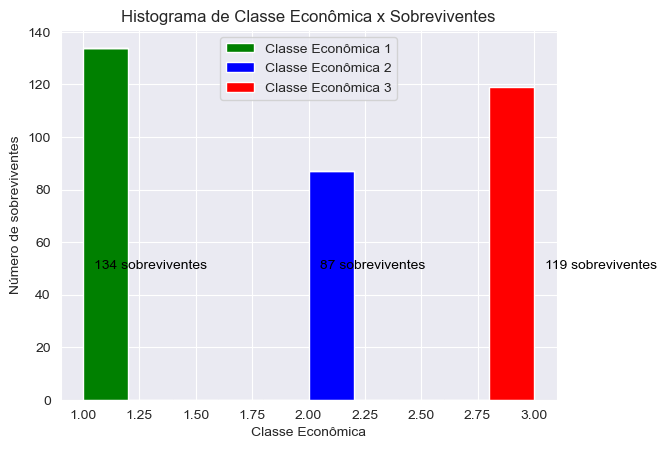

In [40]:
import pandas as pd
import matplotlib.pyplot as plt



plt.hist([dados[(dados['Survived'] == 1) & (dados['Pclass'] == 1)]['Pclass'], dados[(dados['Survived'] == 1) & (dados['Pclass'] == 2)]['Pclass'], dados[(dados['Survived'] == 1) & (dados['Pclass'] == 3)]['Pclass']], stacked=True, color = ['g','b','r'], bins = 10,label = ['Classe Econômica 1','Classe Econômica 2', 'Classe Econômica 3'])
plt.title('Histograma de Classe Econômica x Sobreviventes')
plt.xlabel('Classe Econômica')
plt.ylabel('Número de sobreviventes')
plt.legend()

#Adicionando rótulos de dados
plt.annotate(str(len(dados[(dados['Survived'] == 1) & (dados['Pclass'] == 1)])) + ' sobreviventes', xy=(1.05, 50), color='black')
plt.annotate(str(len(dados[(dados['Survived'] == 1) & (dados['Pclass'] == 2)])) + ' sobreviventes', xy=(2.05, 50), color='black')
plt.annotate(str(len(dados[(dados['Survived'] == 1) & (dados['Pclass'] == 3)])) + ' sobreviventes', xy=(3.05, 50), color='black')

plt.show()

Nóta-se que a classe económica que teve maior quantidade de sobreviventes foi a classe económica Upper (1ª Classe).

**Vamos analizar agora sobre como os portos de embarque afetaram a questão sobrevivência.** 
Vamos criar um novo dataframe, apenas para fazer a análise sobre os embarques. O python não está aceitando fazer a análise
com a coluna 'Embarked' sendo categórica.

In [41]:
dados_modified = dados.copy()
dados_modified['Embarked'] = dados_modified['Embarked'].map({'C': '1', 'Q': '2', 'S': '3'})
dados_modified['Embarked'] = pd.to_numeric(dados_modified['Embarked'], errors = 'coerce')
dados_modified['Sex'] = dados_modified['Sex'].map({'male': '1', 'female': '2'})
dados_modified['Sex'] = pd.to_numeric(dados_modified['Sex'], errors = 'coerce')
display(dados_modified)

dados_modified = dados_modified.groupby("Embarked").mean()
display(dados_modified)

titanicPivoBySex = pd.pivot_table(dados, index = ['Survived'], columns = 'Embarked', aggfunc = len)
display('\Titanic Pivo table\n', titanicPivoBySex)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,2,38.0,1,0,71.2833,1
2,3,1,3,2,26.0,0,0,7.9250,3
3,4,1,1,2,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,3
887,888,1,1,2,19.0,0,0,30.0000,3
888,889,0,3,2,30.0,1,2,23.4500,3
889,890,1,1,1,26.0,0,0,30.0000,1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
1,445.357143,0.553571,1.886905,1.434524,30.630476,0.386905,0.363095,59.954144
2,417.896104,0.389610,2.909091,1.467532,29.305195,0.428571,0.168831,13.276030
3,449.527950,0.336957,2.350932,1.315217,29.522904,0.571429,0.413043,27.079812


'\\Titanic Pivo table\n'

Age          Fare          Parch          PassengerId  ...       \
Embarked   C   Q    S    C   Q    S     C   Q    S           C  ...    S   
Survived                                                        ...        
0         75  47  427   75  47  427    75  47  427          75  ...  427   
1         93  30  217   93  30  217    93  30  217          93  ...  217   

         Pclass          Sex          SibSp           
Embarked      C   Q    S   C   Q    S     C   Q    S  
Survived                                              
0            75  47  427  75  47  427    75  47  427  
1            93  30  217  93  30  217    93  30  217  

[2 rows x 21 columns]

Nóta-se que tivemos uma porcentagem expressiva de passageiros sobreviventes que embarcaram no porto C.

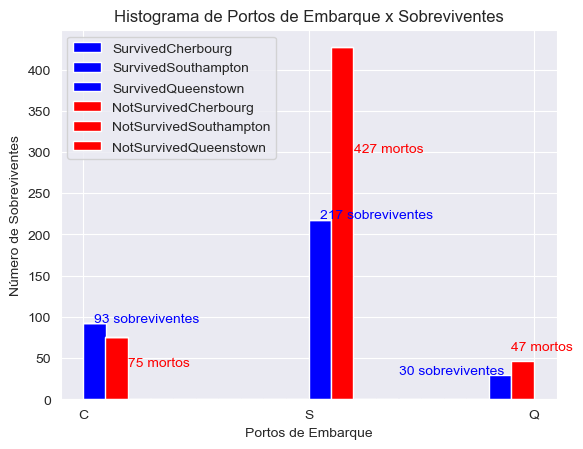

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist([dados[(dados['Survived'] == 1) & (dados['Embarked'] == "C")]['Embarked'], dados[(dados['Survived'] == 1) & (dados['Embarked'] == "S")]['Embarked'], dados[(dados['Survived'] == 1) & (dados['Embarked'] == "Q")]['Embarked']], stacked=True, color = ['b','b','b'], bins = 10,label = ['SurvivedCherbourg', 'SurvivedSouthampton', 'SurvivedQueenstown'], width = 0.1, rwidth = 1.0)
plt.hist([dados[(dados['Survived'] == 0) & (dados['Embarked'] == "C")]['Embarked'], dados[(dados['Survived'] == 0) & (dados['Embarked'] == "S")]['Embarked'], dados[(dados['Survived'] == 0) & (dados['Embarked'] == "Q")]['Embarked']], stacked=True, color=['r','r','r'], bins = 10,label = ['NotSurvivedCherbourg','NotSurvivedSouthampton', 'NotSurvivedQueenstown'], width = 0.1, rwidth = 0.01)

plt.title('Histograma de Portos de Embarque x Sobreviventes')
plt.xlabel('Portos de Embarque')
plt.ylabel('Número de Sobreviventes')
plt.legend()

#Adicionando rótulos de dados
plt.annotate(str(len(dados[(dados['Survived'] == 1) & (dados['Embarked'] == "C")])) + ' sobreviventes', xy=(0.05, 93), color='blue')
plt.annotate(str(len(dados[(dados['Survived'] == 1) & (dados['Embarked'] == "S")])) + ' sobreviventes', xy=(1.05, 219), color='blue')
plt.annotate(str(len(dados[(dados['Survived'] == 1) & (dados['Embarked'] == "Q")])) + ' sobreviventes', xy=(1.40, 30), color='blue')
plt.annotate(str(len(dados[(dados['Survived'] == 0) & (dados['Embarked'] == "C")])) + ' mortos', xy=(0.20, 40), color='red')
plt.annotate(str(len(dados[(dados['Survived'] == 0) & (dados['Embarked'] == "S")])) + ' mortos', xy=(1.20, 300), color='red')
plt.annotate(str(len(dados[(dados['Survived'] == 0) & (dados['Embarked'] == "Q")])) + ' mortos', xy=(1.90, 60), color='red')
plt.show()

**Vamos analizar a variável "Fare" que representa o valor da tarifa paga pela viagem a bordo do Titanic.**

In [43]:
dados_modified = dados.copy()
dados_modified['Embarked'] = dados_modified['Embarked'].map({'C': '1', 'Q': '2', 'S': '3'})
dados_modified['Embarked'] = pd.to_numeric(dados_modified['Embarked'], errors = 'coerce')
dados_modified['Sex'] = dados_modified['Sex'].map({'male': '1', 'female': '2'})
dados_modified['Sex'] = pd.to_numeric(dados_modified['Sex'], errors = 'coerce')
display(dados_modified)

dados_modified = dados_modified.groupby("Survived").mean()
display(dados_modified)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,2,38.0,1,0,71.2833,1
2,3,1,3,2,26.0,0,0,7.9250,3
3,4,1,1,2,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,3
887,888,1,1,2,19.0,0,0,30.0000,3
888,889,0,3,2,30.0,1,2,23.4500,3
889,890,1,1,1,26.0,0,0,30.0000,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,447.016393,2.531876,1.147541,30.483607,0.553734,0.329690,22.117887,2.641166
1,444.358824,1.955882,1.679412,28.469618,0.476471,0.467647,48.209498,2.364706


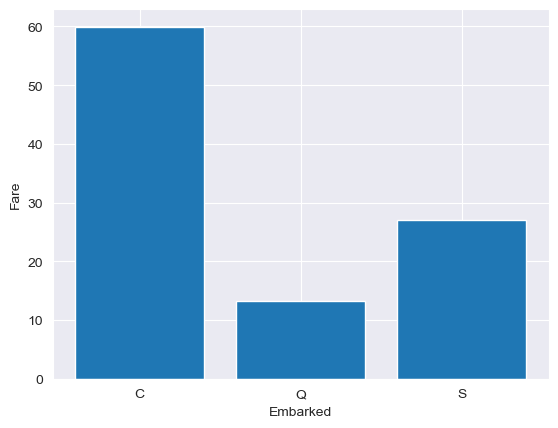

In [44]:
import matplotlib.pyplot as plt 

dados_grouped = dados.groupby('Embarked')['Fare'].mean()
plt.bar(dados_grouped.index, dados_grouped.values, align='center')
plt.xlabel('Embarked') 
plt.ylabel('Fare')
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

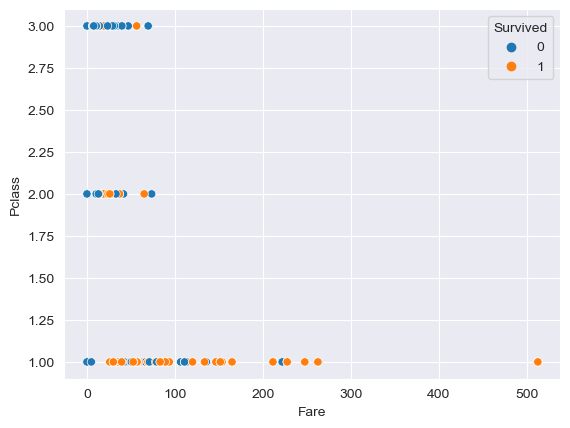

In [45]:
import seaborn as sns 
sns.scatterplot(x='Fare', y='Pclass', hue='Survived', data=dados)

**Vamos analizar neste gráfico de dispersão a correlação entre as variáveis Fare, Pclass e Survived.**

A maioria dos passageiros pagou uma tarifa baixa e viajou na terceira classe.

A taxa de sobrevivência foi maior na primeira classe e menor na terceira classe.

A tarifa e a classe parecem ter uma relação inversa, ou seja, quanto maior a tarifa, menor a classe.

A tarifa e a sobrevivência parecem ter uma relação direta, ou seja, quanto maior a tarifa, maior a chance de sobreviver.

# **Vamos analizar agora com a coluna 'Cabin', para isso vamos importar novamente o Dataframe e fazer um novo tratamento de dados.**

In [46]:
dados_ = pd.read_csv(r"C:\Users\ncali\OneDrive\Documentos\GEIA\Análise Titanic\train.csv", encoding = 'utf8', sep = ',', na_values = 'na')
display(dados_)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
media_age = dados_['Age'].mean().round(0) 
dados_['Age'] = dados_['Age'].fillna(media_age) #completando com a média de Age na coluna Age.

In [48]:
filtro = dados_['Embarked'].isnull()
dados_[filtro]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [49]:
dados_.iloc[61].isnull().any() 
dados_.iloc[829].isnull().any()

True

In [50]:
dados_ = dados_.dropna()
dados_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

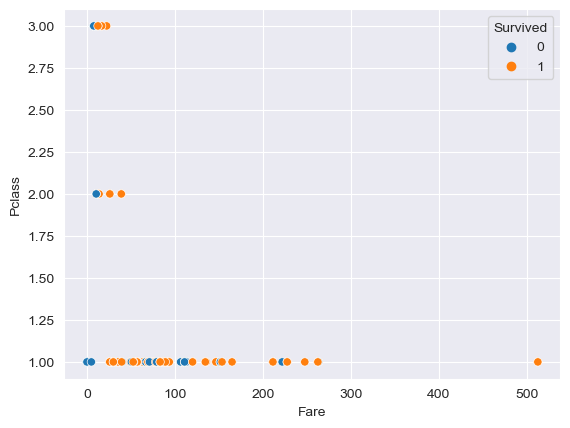

In [51]:
sns.scatterplot(x='Fare', y='Pclass', hue='Survived', data=dados_)

Observemos que neste grupo de passageiros, as tendencias continuam as mesmas feitas na análise anterior.

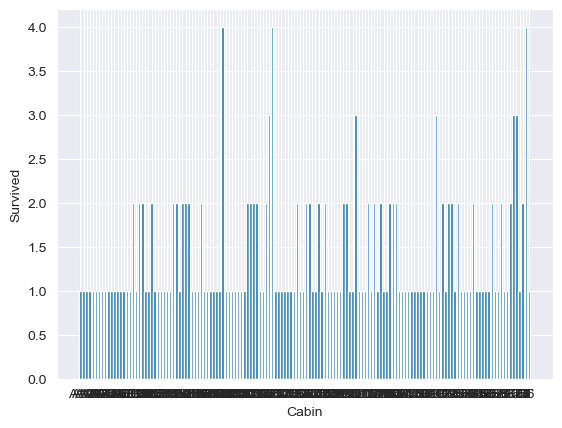

In [52]:
dados_grouped = dados_.groupby('Cabin')['Survived'].count()
plt.bar(dados_grouped.index, dados_grouped.values, align='center')
plt.xlabel('Cabin') 
plt.ylabel('Survived')
plt.show()

Queremos descobrir quais cabines foram as que tiveram 4 Sobreviventes.

In [53]:
from collections import Counter
contador = Counter(dados_['Cabin'])
num_distintos = len(contador.keys())
print(f"A lista tem {num_distintos} elementos distintos.")


A lista tem 146 elementos distintos.


In [54]:
dados_agrupado = dados_.groupby('Cabin')['Survived'].sum()
pd.set_option("display.max_rows", None)
display(dados_agrupado)

Cabin
A10                0
A14                0
A16                1
A19                0
A20                1
A23                1
A24                0
A26                1
A31                1
A32                0
A34                1
A36                0
A5                 0
A6                 1
A7                 0
B101               1
B102               0
B18                2
B19                0
B20                2
B22                1
B3                 1
B30                0
B35                2
B37                0
B38                0
B39                1
B4                 1
B41                1
B42                1
B49                2
B5                 2
B50                1
B51 B53 B55        1
B57 B59 B63 B66    2
B58 B60            1
B69                1
B71                0
B73                1
B77                2
B78                1
B79                1
B80                1
B82 B84            0
B86                0
B94                0
B96 B98            4
C101   

In [55]:
df_filtrado_ = dados_agrupado.loc[dados_agrupado == 4]
df_filtrado = dados_agrupado.loc[dados_agrupado == 3]
print(f'O número de passageiros sobreviventes nas Cabines {df_filtrado_}foram .')
print(f'O número de passageiros sobreviventes nas Cabines {df_filtrado}foram .')

O número de passageiros sobreviventes nas Cabines Cabin
B96 B98    4
Name: Survived, dtype: int64foram .
O número de passageiros sobreviventes nas Cabines Cabin
E101    3
F33     3
Name: Survived, dtype: int64foram .


In [56]:
passageiros_Cabin_B96_B98 = dados_.loc[(dados_['Cabin'] == 'B96 B98') & (dados['Survived'] == 1)]
display(passageiros_Cabin_B96_B98)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


Conseguimos observar que as cabines nos quais tivemos 4 sobreviventes, eram da primeira classe!


In [57]:
passageiros_Cabin_E101 = dados_.loc[(dados_['Cabin'] == 'E101') & (dados['Survived'] == 1)]
display(passageiros_Cabin_E101)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.00,E101,S
303,304,1,2,"Keane, Miss. Nora A",female,30.0,0,0,226593,12.35,E101,Q
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.50,E101,S


In [58]:
passageiros_Cabin_F33 = dados_.loc[(dados_['Cabin'] == 'F33') & (dados['Survived'] == 1)]
display(passageiros_Cabin_F33)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0,F33,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S


**As cabines que tiveram mais sobreviventes foram as cabines da 1ª Classe!**